# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os

#from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

import tensorflow as tf

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install resampy

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ndewira/cough-sound

 99% 428M/430M [00:15<00:00, 30.0MB/s]
100% 430M/430M [00:15<00:00, 28.6MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cough-sound.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
#cough_file = glob('/content/deeplearningaudio/dataset2/combinedsegmentedaugmented/')

In [ ]:
cough_file = '/content/deeplearningaudio/dataset2/combinedsegmentedaugmented/'

# **Data Sample**

In [ ]:
data, sr = librosa.load(cough_file + 'dry_1.wav')
print(f'data: {data[:10]}')
print(f'shape data: {data.shape}')
print(f'sr: {sr}')

data: [-0.00175479 -0.00356199 -0.00383375 -0.00389362 -0.00376432 -0.0030602
 -0.00162743 -0.00166273 -0.00169903 -0.00024454]
shape data: (10865,)
sr: 22050


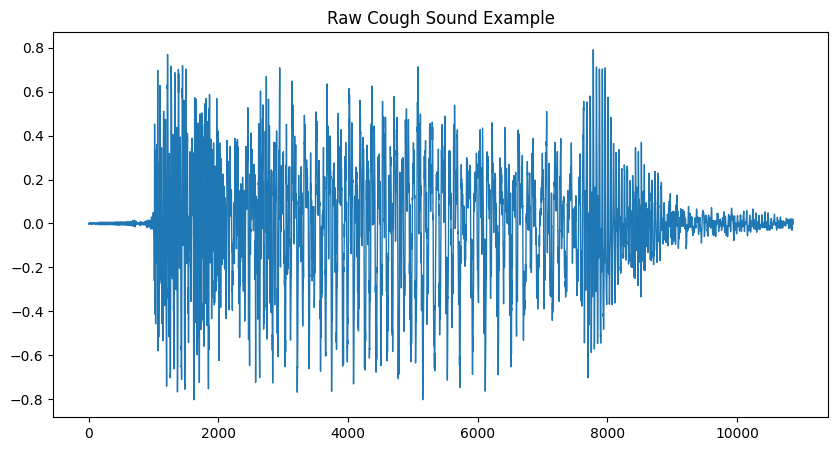

In [ ]:
pd.Series(data).plot(figsize=(10, 5),
                     lw=1,
                     title='Raw Cough Sound Example',
                     )
plt.show()

ipd.Audio(cough_file + 'dry_1.wav')

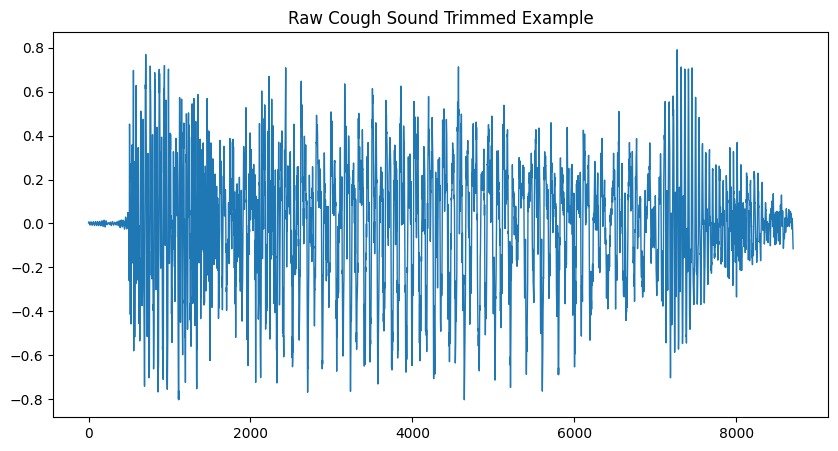

In [ ]:
data_trimmed, test = librosa.effects.trim(data, top_db=6)
pd.Series(data_trimmed).plot(figsize=(10,5),
                             lw=1,
                             title='Raw Cough Sound Trimmed Example')
plt.show()

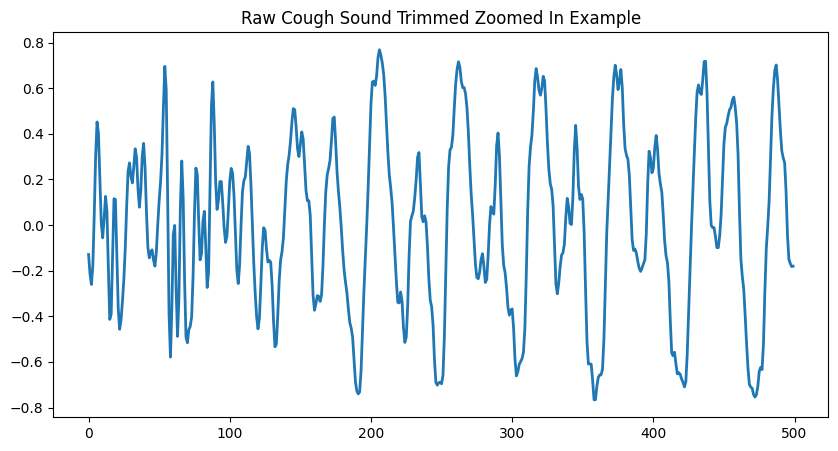

In [ ]:
pd.Series(data_trimmed[500:1000]).plot(figsize=(10,5),
                               lw=2,
                               title='Raw Cough Sound Trimmed Zoomed In Example')
plt.show()

In [ ]:
new_shape = librosa.stft(data_trimmed)
ns_db = librosa.amplitude_to_db(np.abs(new_shape), ref=np.max)
print(ns_db)

[[-69.72072  -50.442726 -51.171516 ... -46.81017  -80.       -47.583103]
 [-70.67036  -49.680477 -47.570255 ... -44.695667 -44.255547 -47.527077]
 [-60.076458 -47.79847  -47.963814 ... -42.49925  -48.267647 -48.780746]
 ...
 [-80.       -80.       -80.       ... -80.       -73.45873  -67.45044 ]
 [-80.       -80.       -80.       ... -80.       -73.45861  -67.45037 ]
 [-80.       -80.       -80.       ... -80.       -73.458176 -67.45032 ]]


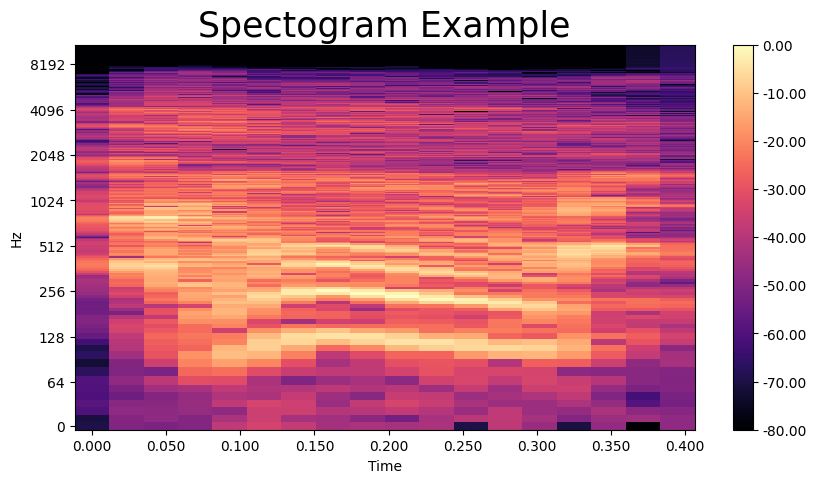

In [ ]:
spec, plot_spec = plt.subplots(figsize=(10,5))
trans_spec = librosa.display.specshow(ns_db,
                                      x_axis='time',
                                      y_axis='log',
                                      ax=plot_spec)
plot_spec.set_title('Spectogram Example', fontsize=25)
spec.colorbar(trans_spec, ax=plot_spec, format=f'%0.2f')
plt.show()

In [ ]:
ns_mel = librosa.feature.melspectrogram(y=data_trimmed,
                              sr=sr,
                              n_mels=128 * 2)
ns_db_mel = librosa.amplitude_to_db(ns_mel, ref=np.max)
print(ns_db_mel)

[[-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 ...
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]]


<function matplotlib.pyplot.show(close=None, block=None)>

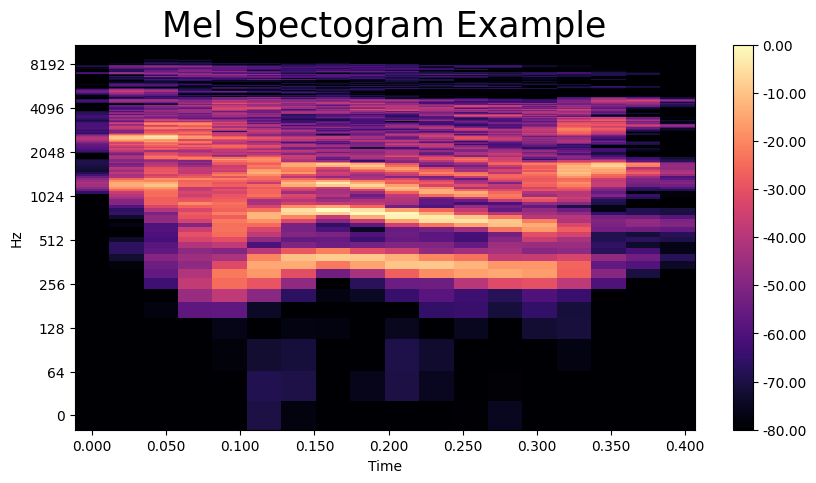

In [ ]:
spec, plot_spec = plt.subplots(figsize=(10,5))
trans_spec = librosa.display.specshow(ns_db_mel,
                                      x_axis='time',
                                      y_axis='log',
                                      ax=plot_spec)
plot_spec.set_title('Mel Spectogram Example', fontsize=25)
spec.colorbar(trans_spec, ax=plot_spec, format=f'%0.2f')
plt.show

# **Data Preprocessing**

In [ ]:
cough_csv = pd.read_csv('/content/deeplearningaudio/dataset2/segmentedaugmented.csv')
cough_csv.tail(10)

,filename,label
4000,wet_1936.wav,wet
4001,wet_1937.wav,wet
4002,wet_1938.wav,wet
4003,wet_1939.wav,wet
4004,wet_1940.wav,wet
4005,wet_1941.wav,wet
4006,wet_1942.wav,wet
4007,wet_1943.wav,wet
4008,wet_1944.wav,wet
4009,wet_1945.wav,wet


In [ ]:
balance = cough_csv['label'].value_counts()
print(balance)

dry    2065
wet    1945
Name: label, dtype: int64


In [ ]:
def extractor(file):
    sound_data, sr_all = librosa.load(file, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=sound_data, sr=sr_all, n_mfcc=40)
    mfccs_balance = np.mean(mfccs.T, axis=0)
    return mfccs_balance

In [ ]:
extracted = []
for cough_data in os.listdir((cough_file)):
      if cough_data.endswith('.wav'):  # Consider only .wav files
        file_path = os.path.join(cough_file, cough_data)
        import resampy
        d_name = extractor(file_path)
        print('File:', cough_data)
        print('Features:', d_name)
        print('-------------------------')
for i, row in cough_csv.iterrows():
      label = row['label']
      class_label = pd.DataFrame({'label': [label]})
      extracted.append([d_name, class_label])

Streaming output truncated to the last 5000 lines.
File: dry_371.wav
Features: [-2.0774780e+02  1.5749162e+02 -3.3651382e+01  2.9364676e+01
 -4.0642841e+01  3.2949577e+01 -2.9620737e+01 -2.5288977e+01
  1.1455960e+01  8.6774158e+00 -4.7921147e+00 -1.6080282e+01
 -5.0875087e+00 -1.2332896e+01  1.1078399e+00 -8.6934071e+00
 -2.3464344e+00  2.6528828e+00  2.3396857e+00 -1.2810220e+01
 -2.2021414e+01  1.8452663e+00  2.0762322e+00 -5.0476971e+00
 -3.8770151e-01  8.1548637e-01 -3.5894954e+00 -4.0092406e+00
 -1.1409608e+01 -8.9957428e+00  9.5506096e-01 -5.5102503e-01
 -8.9458746e-01 -3.3215754e+00 -5.4619098e+00  2.1233281e-02
 -2.1498482e-01 -3.2411239e+00 -2.3924046e+00  5.4090805e+00]
-------------------------
File: dry_1811.wav
Features: [-1.98932999e+02  1.05622749e+02 -1.17114784e+02  4.11692619e+01
 -9.14807053e+01 -4.69035578e+00 -1.85507355e+01 -4.56444893e+01
  4.82195228e-01 -8.63078785e+00  1.02515879e+01 -1.29064140e+01
  1.89385664e+00 -3.06603408e+00  1.19465828e+01  1.85657520

In [ ]:
df_extracted = pd.DataFrame(extracted, columns=['feature', 'class'])
df_extracted.tail(15)

,feature,class
3995,"[-263.07773, 89.75097, -48.555332, 26.354336, ...",label 0 wet
3996,"[-263.07773, 89.75097, -48.555332, 26.354336, ...",label 0 wet
3997,"[-263.07773, 89.75097, -48.555332, 26.354336, ...",label 0 wet
3998,"[-263.07773, 89.75097, -48.555332, 26.354336, ...",label 0 wet
3999,"[-263.07773, 89.75097, -48.555332, 26.354336, ...",label 0 wet
4000,"[-263.07773, 89.75097, -48.555332, 26.354336, ...",label 0 wet
4001,"[-263.07773, 89.75097, -48.555332, 26.354336, ...",label 0 wet
4002,"[-263.07773, 89.75097, -48.555332, 26.354336, ...",label 0 wet
4003,"[-263.07773, 89.75097, -48.555332, 26.354336, ...",label 0 wet
4004,"[-263.07773, 89.75097, -48.555332, 26.354336, ...",label 0 wet


In [ ]:
X = np.array(df_extracted['feature'].tolist())
y = np.array(df_extracted['class'].tolist())

In [ ]:
y

array([[['dry']],

       [['dry']],

       [['dry']],

       ...,

       [['wet']],

       [['wet']],

       [['wet']]], dtype=object)

In [ ]:
y.shape

(4010, 1, 1)

In [ ]:
y_flat = y.reshape(-1, 1)

# Convert the flattened array to a 2D array
y = np.concatenate(y_flat, axis=0)

In [ ]:
X.shape

(4010, 40)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = to_categorical(encoder.fit_transform(y))
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=0)
label = y.shape[1]

In [ ]:
X_train

array([[-2.6307773e+02,  8.9750969e+01, -4.8555332e+01, ...,
        -7.3296604e+00, -8.2676810e-01,  2.2575453e-02],
       [-2.6307773e+02,  8.9750969e+01, -4.8555332e+01, ...,
        -7.3296604e+00, -8.2676810e-01,  2.2575453e-02],
       [-2.6307773e+02,  8.9750969e+01, -4.8555332e+01, ...,
        -7.3296604e+00, -8.2676810e-01,  2.2575453e-02],
       ...,
       [-2.6307773e+02,  8.9750969e+01, -4.8555332e+01, ...,
        -7.3296604e+00, -8.2676810e-01,  2.2575453e-02],
       [-2.6307773e+02,  8.9750969e+01, -4.8555332e+01, ...,
        -7.3296604e+00, -8.2676810e-01,  2.2575453e-02],
       [-2.6307773e+02,  8.9750969e+01, -4.8555332e+01, ...,
        -7.3296604e+00, -8.2676810e-01,  2.2575453e-02]], dtype=float32)

In [ ]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(20, 2)

# **Data Modelling**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adamax
from tensorflow.keras.callbacks import ModelCheckpoint

from datetime import datetime
from sklearn import metrics

In [ ]:
labels = y.shape[1]

In [ ]:
model = Sequential()

model.add(Dense(100, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(labels))
model.add(Activation('softmax'))

my_model = model
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')

checkpoint = ModelCheckpoint(filepath='saved_model/cough_sound_classification.hdf5',
                             verbose=1,
                             save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size = 64, epochs= 150,
          validation_data=(X_test, y_test), callbacks=[checkpoint], verbose=1)
duration = datetime.now() - start
#print('Optimizer', optimizer.__class__.__name__)
#print('Loss', loss)
print('----------------------------------------')
print('Training completed in time: ', duration)

Epoch 1/150
62/63 [============================>.] - ETA: 0s - loss: 0.6927 - accuracy: 0.5164
Epoch 1: val_loss improved from inf to 0.70351, saving model to saved_model/cough_sound_classification.hdf5
63/63 [==============================] - 2s 16ms/step - loss: 0.6927 - accuracy: 0.5158 - val_loss: 0.7035 - val_accuracy: 0.3500
Epoch 2/150
55/63 [=========================>....] - ETA: 0s - loss: 0.6927 - accuracy: 0.5165
Epoch 2: val_loss improved from 0.70351 to 0.70326, saving model to saved_model/cough_sound_classification.hdf5
63/63 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5158 - val_loss: 0.7033 - val_accuracy: 0.3500
Epoch 3/150
50/63 [======================>.......] - ETA: 0s - loss: 0.6926 - accuracy: 0.5169
Epoch 3: val_loss did not improve from 0.70326
63/63 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5158 - val_loss: 0.7033 - val_accuracy: 0.3500
Epoch 4/150
54/63 [========================>.....] - ETA: 0s

In [ ]:
accuracy = model.evaluate(X_test, y_test, verbose=0)
print(accuracy)

[0.704081118106842, 0.3499999940395355]


In [ ]:
X_test[1]

array([-2.6307773e+02,  8.9750969e+01, -4.8555332e+01,  2.6354336e+01,
       -3.5736847e+01,  4.7686840e+01, -4.3533764e+01,  2.4709389e+00,
       -4.7848156e+01,  2.2533405e+01, -9.1582766e+00,  4.9838696e+00,
       -9.7287731e+00, -8.4671431e+00, -1.1511316e+01, -3.2369585e+00,
       -6.3306746e+00,  1.8948730e+00, -1.1086235e+01, -1.5790794e+01,
        4.8169518e+00, -1.1832171e+01, -2.5783906e+00, -1.3236514e+01,
       -8.1190330e-01,  7.0778137e-01, -1.7851006e+00, -3.6032228e+00,
        5.8465080e+00, -4.2251372e+00, -2.8092923e+00,  8.7984449e-01,
        2.9205914e+00,  5.8594454e-02,  5.6814396e-01, -1.0895771e+00,
       -5.4968996e+00, -7.3296604e+00, -8.2676810e-01,  2.2575453e-02],
      dtype=float32)